### 神经网络-多层感知器分类模型代码示例

In [1]:
# Step1:使用sklearn自带的iris数据集 
from sklearn import datasets
# 导入sklearn自带的iris数据集
iris = datasets.load_iris()
# Step2:拆分成训练集和测试集 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3,random_state=123456)  
hidden_layer_sizes=(100,)

# Step3: 训练
'''
指定神经网络只有一个隐藏层，其中有100个神经元，这是最简单的多层感知器模型。
如果需要增加隐藏层，可以这样输入：hidden_layer_sizes=(100,10)，
即第1个隐藏层有100个神经元，第2个隐藏层有10个神经元。
'''
from sklearn.neural_network import MLPClassifier
# 实例化模型并训练
model = MLPClassifier(hidden_layer_sizes=(100,),activation='logistic',solver='adam',max_iter=1000)
model.fit(X_train,y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [2]:
# 输入层（4个神经元)与隐藏层(100个神经元)权重：4*100
print(model.coefs_[0].shape)
# 隐藏层(100个神经元)与输出层（3个神经元）权重：100*3
print(model.coefs_[1].shape) 

# 通过pandas查看权重矩阵值
import pandas as pd

# 输入层与隐藏层权重：4*100
pd.DataFrame(model.coefs_[0]).iloc[:,:10]      #只显示前10列


(4, 100)
(100, 3)


,0,1,2,3,4,5,6,7,8,9
0,0.219040,0.096504,-0.010667,0.411054,0.081708,-0.130794,0.250019,-0.097671,0.051972,-0.167666
1,0.308380,0.403990,-0.173202,0.297758,0.280477,-0.292401,0.296252,-0.479295,-0.154248,-0.332710
2,-0.431294,-0.383964,-0.073143,-0.631456,-0.297581,0.396151,-0.471614,0.575113,-0.009270,0.406271
3,-0.624855,-0.527996,-0.080895,-0.659163,-0.594465,0.456352,-0.677818,0.483078,-0.545790,0.583419


In [3]:
# 隐藏层与输出层权重：100*3
pd.DataFrame(model.coefs_[1]).iloc[:10,]    # 只显示前10行

,0,1,2
0,0.268242,0.218108,-0.570905
1,0.268988,0.104837,-0.575980
2,-0.058441,0.165041,-0.168970
3,0.353336,0.203316,-0.375923
4,0.221463,0.007494,-0.355701
5,-0.374673,0.002143,0.480858
6,0.276072,0.248481,-0.464509
7,-0.391237,0.201533,0.462128
8,-0.029217,0.334666,-0.522663
9,-0.368427,-0.163380,0.471772


In [4]:
# Step4：模型评估 
'''
针对分类模型，有很多评估方法，常用的有
误分类矩阵 confusion_matrix
分类报告 classification_report
ROC曲线和AUC值
'''
# 方法1：直接使用模型的score方法计算正确率
print(model.score(X_test,y_test))
# 方法2：使用sklearn.metrics下的classification_report方法
# 先对测试集进行预测
y_pred = model.predict(X_test) #预测类别标签
y_pred_prob = model.predict_proba(X_test) #预测类别概率

# 分类评估报告classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 十大预测算法决策边界对比 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


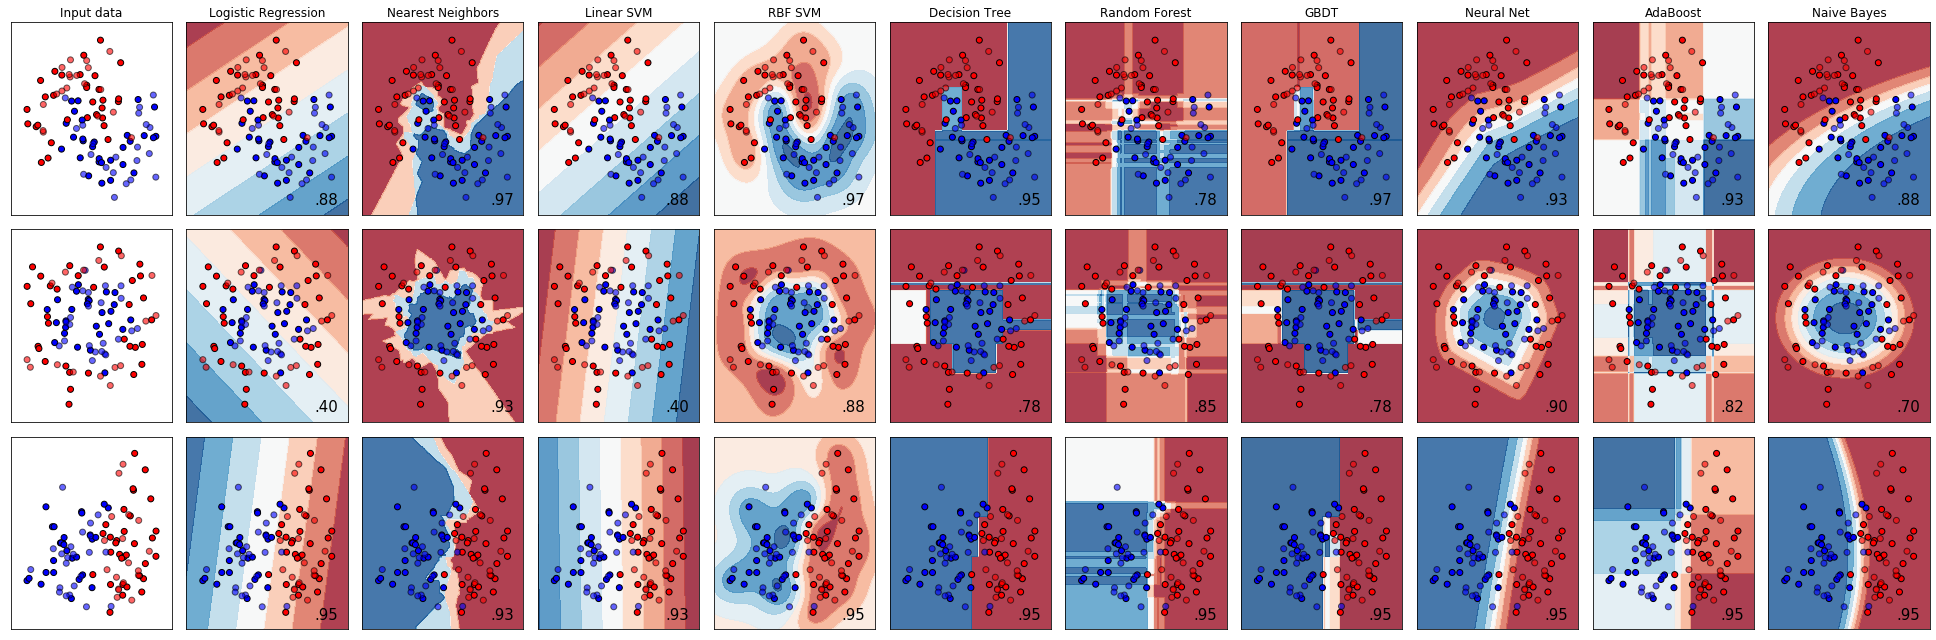

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

h = .02  # step size in the mesh

names = ["Logistic Regression","Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "GBDT", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GradientBoostingClassifier(max_depth=5, n_estimators=10),
    MLPClassifier(alpha=1,max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()